In [0]:
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import pandas as pd 
df=pd.read_csv('gdrive/My Drive/training.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4206321 entries, 0 to 4206320
Data columns (total 4 columns):
geohash6     object
day          int64
timestamp    object
demand       float64
dtypes: float64(1), int64(1), object(2)
memory usage: 128.4+ MB


In [5]:
df.isnull().sum()

geohash6     0
day          0
timestamp    0
demand       0
dtype: int64

In [6]:
!pip install Geohash

  Stored in directory: /root/.cache/pip/wheels/3e/26/1f/e62bf5f16cb87b2e4998d638ca7e019b2d507c691deb17d794
Successfully built Geohash


In [7]:
!pip install geohash

In [8]:
!pip install python-geohash

  Stored in directory: /root/.cache/pip/wheels/b5/64/5a/6a286481fc7c2a698d2f297d4c90af19946be430b23eba9a33
Successfully built python-geohash


In [0]:
import Geohash

In [0]:
# Get the longitude and latitude from the geohash
def decodegeo(geo, which):
  if len(geo) >= 6:
    geodecoded =  Geohash.decode_exactly(geo)
    return geodecoded[which] 
  else:
    return 0

In [0]:
df['latitude'] = df['geohash6'].apply(lambda geo: decodegeo(geo, 0))
df['longitude'] = df['geohash6'].apply(lambda geo: decodegeo(geo, 1))

In [12]:
df.dtypes

geohash6      object
day            int64
timestamp     object
demand       float64
latitude     float64
longitude    float64
dtype: object

In [13]:
df.head

<bound method NDFrame.head of         geohash6  day timestamp    demand  latitude  longitude
0         qp03wc   18      20:0  0.020072 -5.353088  90.653687
1         qp03pn   10     14:30  0.024721 -5.413513  90.664673
2         qp09sw    9      6:15  0.102821 -5.325623  90.906372
3         qp0991   32       5:0  0.088755 -5.353088  90.752563
4         qp090q   15       4:0  0.074468 -5.413513  90.719604
5         qp03tu    1     12:15  0.023843 -5.336609  90.609741
6         qp096d   25      3:30  0.007460 -5.391541  90.818481
7         qp03nr   51     20:45  0.000293 -5.408020  90.631714
8         qp093r   48      6:15  0.054170 -5.364075  90.763550
9         qp03r2    4     22:15  0.123463 -5.402527  90.675659
10        qp09kb   45      9:15  0.026177 -5.402527  90.917358
11        qp03rp   52     11:45  0.359406 -5.364075  90.664673
12        qp03w9   46     12:15  0.514136 -5.353088  90.642700
13        qp096m   34     14:45  0.059740 -5.375061  90.807495
14        qp091u   40    

In [0]:
df = df.sort_values(by=['geohash6','day','timestamp'])

In [15]:
df.head(5)

,geohash6,day,timestamp,demand,latitude,longitude
2021861,qp02yc,1,11:15,0.013487,-5.484924,90.653687
1403484,qp02yc,1,12:0,0.003709,-5.484924,90.653687
2873712,qp02yc,1,2:45,0.020592,-5.484924,90.653687
2643238,qp02yc,1,3:0,0.010292,-5.484924,90.653687
1791986,qp02yc,1,4:0,0.006676,-5.484924,90.653687


In [0]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

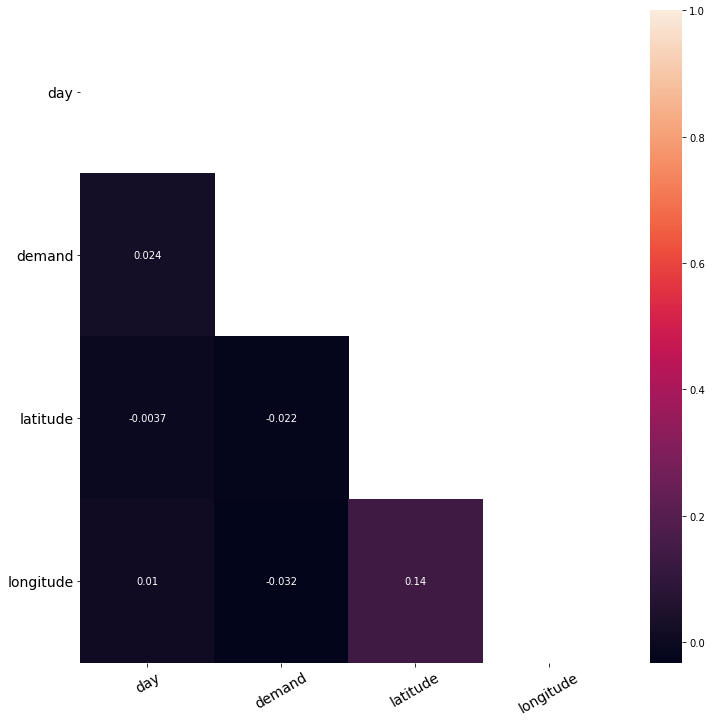

In [17]:
def correlation_heat_map(df): 
    corrs = df.corr() 

    # Set the default matplotlib figure size:
    fig, ax = plt.subplots(figsize=(12,12)) 

    # Generate a mask for the upper triangle (taken from seaborn example gallery)
    mask = np.zeros_like(corrs, dtype=np.bool) 
    mask[np.triu_indices_from(mask)] = True

    # Plot the heatmap with seaborn.
    # Assign the matplotlib axis the function returns. This will let us resize the labels.    
    ax = sns.heatmap(corrs, mask=mask, annot=True)

    # Resize the labels.
    ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=14, rotation=30)
    ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=14, rotation=0)

    # If you put plt.show() at the bottom, it prevents those useless printouts from matplotlib.
    plt.show()

correlation_heat_map(df)

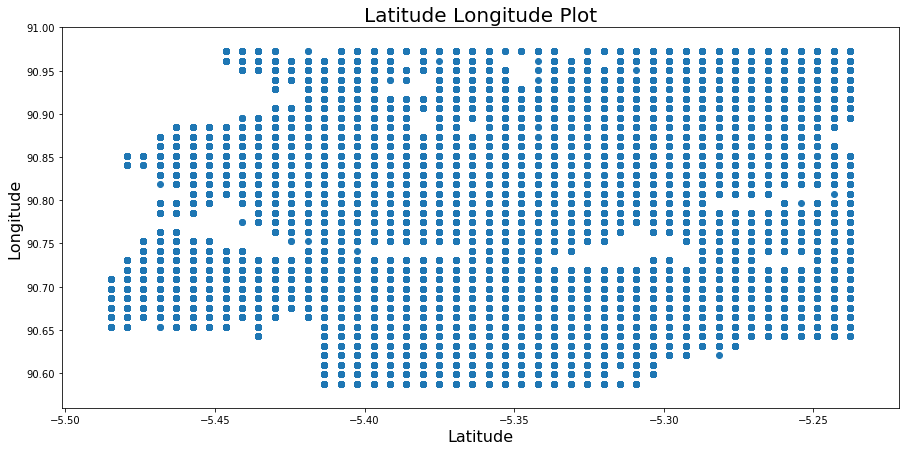

In [18]:
plt.figure(figsize=(15,7))
plt.scatter(x=df['latitude'],y=df['longitude'])
plt.title('Latitude Longitude Plot', fontsize=20)
plt.xlabel('Latitude', fontsize=16)
plt.ylabel('Longitude', fontsize=16)
plt.show()

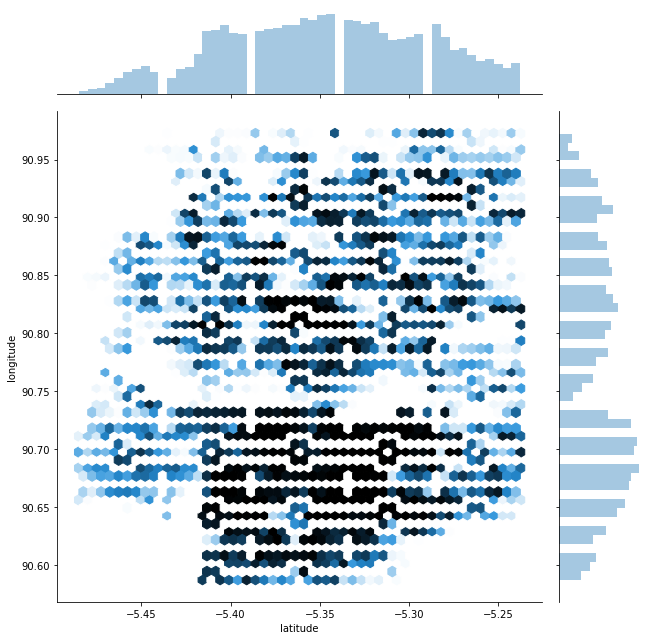

In [19]:
sns.jointplot(x=df['latitude'],y=df['longitude'],height=9,kind='hex')
plt.show()

In [0]:
df_sort_time = df.copy()

In [0]:
df_sort_time['timestamp'] = df_sort_time['timestamp'].apply(lambda x: float(x.replace(':','.')))

In [22]:
df_sort_time.dtypes

geohash6      object
day            int64
timestamp    float64
demand       float64
latitude     float64
longitude    float64
dtype: object

In [0]:
df_sort_time = df_sort_time.sort_values(by=['geohash6','day','timestamp'])

In [24]:
df_sort_time.head(15)

,geohash6,day,timestamp,demand,latitude,longitude
2873712,qp02yc,1,2.45,0.020592,-5.484924,90.653687
2643238,qp02yc,1,3.00,0.010292,-5.484924,90.653687
1791986,qp02yc,1,4.00,0.006676,-5.484924,90.653687
4022333,qp02yc,1,4.30,0.003822,-5.484924,90.653687
3848343,qp02yc,1,6.45,0.011131,-5.484924,90.653687
2021861,qp02yc,1,11.15,0.013487,-5.484924,90.653687
1403484,qp02yc,1,12.00,0.003709,-5.484924,90.653687
897330,qp02yc,2,4.30,0.011041,-5.484924,90.653687
4014082,qp02yc,2,5.00,0.040743,-5.484924,90.653687
2613081,qp02yc,2,8.45,0.026320,-5.484924,90.653687


In [0]:
df_sort_time = df_sort_time.sort_values(by=['timestamp'])

In [26]:
df_sort_time.head()

,geohash6,day,timestamp,demand,latitude,longitude
886923,qp03mt,39,0.0,0.033189,-5.375061,90.598755
2650255,qp096y,27,0.0,0.069835,-5.369568,90.829468
3798094,qp03rb,34,0.0,0.013098,-5.402527,90.697632
965140,qp03zt,34,0.0,0.125923,-5.287170,90.686646
2784209,qp03p6,39,0.0,0.033740,-5.435486,90.675659


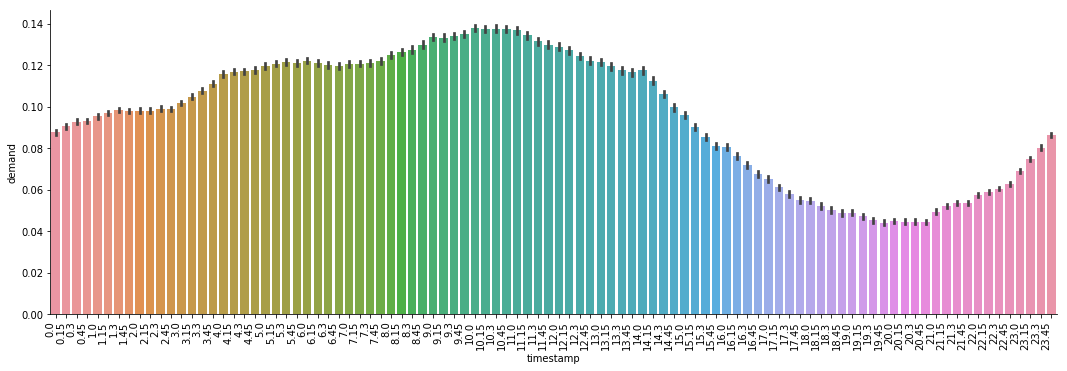

In [27]:
sns.catplot(x='timestamp', y='demand', 
               data=df_sort_time, kind='bar', aspect=3).set_xticklabels(rotation=90, horizontalalignment='right')

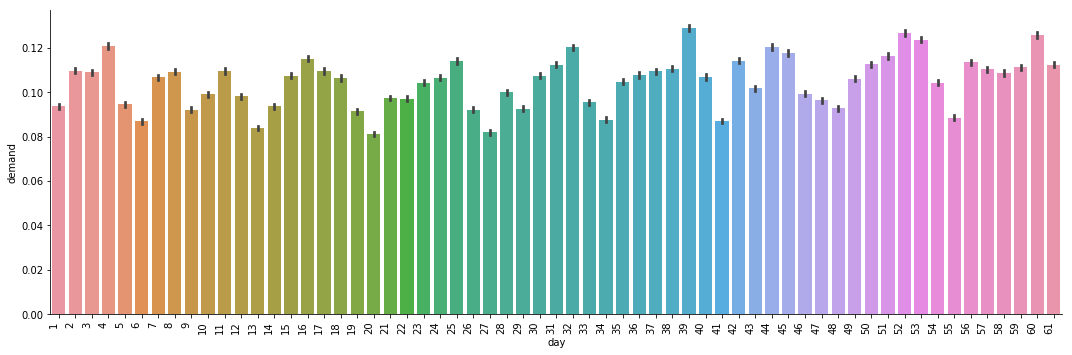

In [28]:
sns.catplot(x='day', y='demand', 
               data=df_sort_time, kind='bar', aspect=3).set_xticklabels(rotation=90, horizontalalignment='right')

Text(0.5, 1.0, 'Demand along the South-North direction')

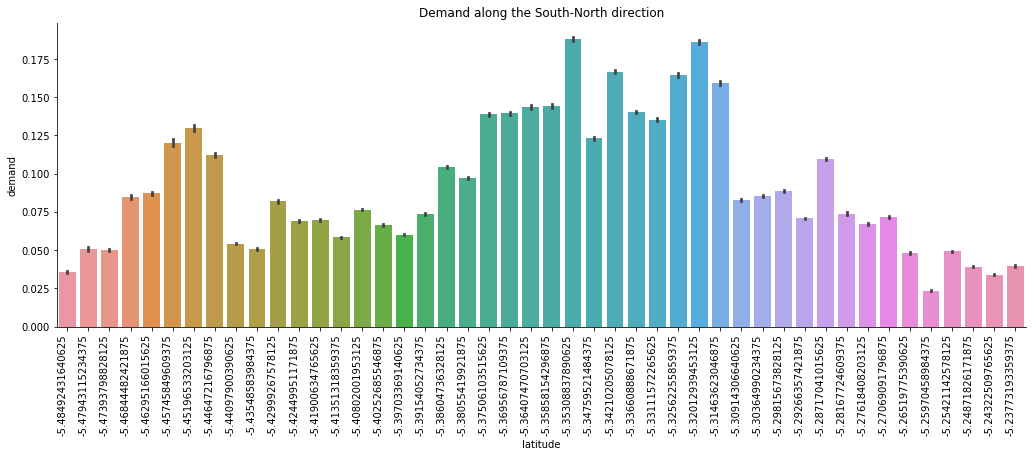

In [29]:
sns.catplot(x='latitude', y='demand', 
               data=df_sort_time, kind='bar', aspect=3).set_xticklabels(rotation=90, horizontalalignment='right')
plt.title('Demand along the South-North direction')

Text(0.5, 1.0, 'Demand along the West-East direction')

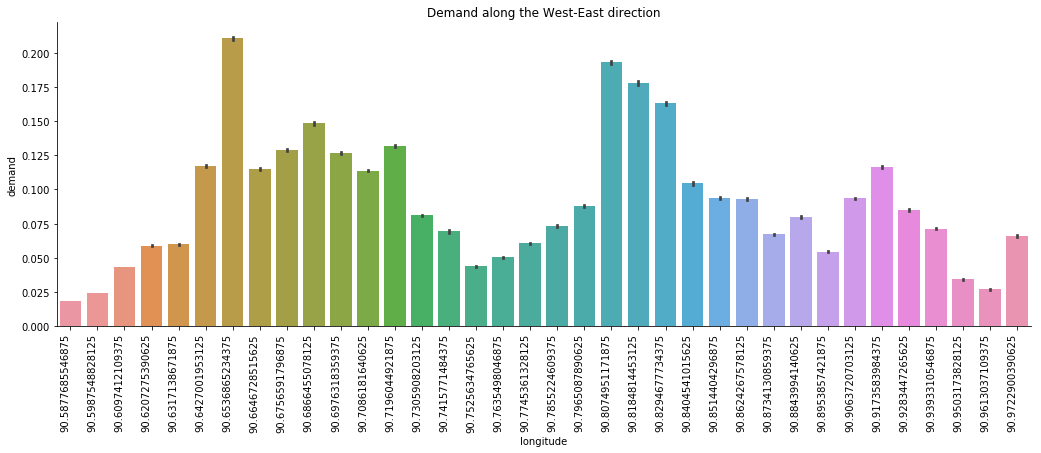

In [30]:
sns.catplot(x='longitude', y='demand', 
               data=df_sort_time, kind='bar', aspect=3).set_xticklabels(rotation=90, horizontalalignment='right')
plt.title('Demand along the West-East direction')

In [0]:
def time_preperation(dataframe):
    dataframe[['hour', 'min']] = dataframe['timestamp'].str.split(':', expand=True)      
    return dataframe

In [32]:
time_preperation(df)

,geohash6,day,timestamp,demand,latitude,longitude,hour,min
2021861,qp02yc,1,11:15,0.013487,-5.484924,90.653687,11,15
1403484,qp02yc,1,12:0,0.003709,-5.484924,90.653687,12,0
2873712,qp02yc,1,2:45,0.020592,-5.484924,90.653687,2,45
2643238,qp02yc,1,3:0,0.010292,-5.484924,90.653687,3,0
1791986,qp02yc,1,4:0,0.006676,-5.484924,90.653687,4,0
4022333,qp02yc,1,4:30,0.003822,-5.484924,90.653687,4,30
3848343,qp02yc,1,6:45,0.011131,-5.484924,90.653687,6,45
1754613,qp02yc,2,12:0,0.006989,-5.484924,90.653687,12,0
886989,qp02yc,2,22:45,0.031419,-5.484924,90.653687,22,45
897330,qp02yc,2,4:30,0.011041,-5.484924,90.653687,4,30
